In [1]:
# Packages importieren
import joblib

import shap
import lime
import lime.lime_tabular

import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.tree import export_graphviz, export_text, plot_tree
from sklearn.tree import DecisionTreeClassifier, _tree

In [2]:
# Datenabrufen
X_train = pd.read_csv("../Resampling/X_train.csv", index_col=0)
X_test = pd.read_csv("../Resampling/X_test.csv", index_col=0)
X_val = pd.read_csv("../Resampling/X_val.csv", index_col=0)

X_train_stm = pd.read_csv("../Resampling/X_train_stm.csv", index_col=0)
X_test_stm = pd.read_csv("../Resampling/X_test_stm.csv", index_col=0)
X_val_stm = pd.read_csv("../Resampling/X_val_stm.csv", index_col=0)

y_train = pd.read_csv("../Resampling/y_train.csv", index_col=0)
y_train_stm = pd.read_csv("../Resampling/y_train_stm.csv", index_col=0)

y_test = pd.read_csv("../Resampling/y_test.csv", index_col=0)
y_val = pd.read_csv("../Resampling/y_val.csv", index_col=0)

print("Alle Datensätze wurden importiert.")

Alle Datensätze wurden importiert.


In [3]:
# Path vorbereiten und Model importieren
modell = joblib.load('../Modelle/Entscheidungsbaum/decision_tree.pkl')

In [4]:
# Perturbieren Nr. 27174 positive Änderung
obs_original_1 = X_test.iloc[2]
obs_1p = obs_original_1.copy()

obs_1p.iloc[0:3] = obs_1p.iloc[0:3] * 0.95
obs_1p['GenHlth'] = obs_1p['GenHlth'] - 1
obs_1p['Age'] = obs_1p['Age'] - 1
obs_1p['Education'] = obs_1p['Education'] + 1
obs_1p['Income'] = obs_1p['Income'] + 0 # Schon höchsten

print(obs_1p)

BMI                    -0.230328
MentHlth               -0.427943
PhysHlth               -0.486977
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 1.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     4.000000
Education               6.000000
Income                  8.000000
Name: 27174, dtype: float64


In [5]:
# Perturbieren Nr. 27174 negative Änderung
obs_original_1 = X_test.iloc[2]
obs_1n = obs_original_1.copy()

obs_1n.iloc[0:3] = obs_1n.iloc[0:3] * 1.05
obs_1n['GenHlth'] = obs_1n['GenHlth'] + 1
obs_1n['Age'] = obs_1n['Age'] + 1
obs_1n['Education'] = obs_1n['Education'] - 1
obs_1n['Income'] = obs_1n['Income'] - 1

print(obs_1n)

BMI                    -0.254573
MentHlth               -0.472989
PhysHlth               -0.538237
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 3.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     6.000000
Education               4.000000
Income                  7.000000
Name: 27174, dtype: float64


In [6]:
# Perturbieren Nr. 225051 positive Änderung
obs_original_2 = X_test.iloc[1]
obs_2p = obs_original_2.copy()

obs_2p.iloc[0:3] = obs_2p.iloc[0:3] * 0.95
obs_2p['GenHlth'] = obs_2p['GenHlth'] - 1
obs_2p['Age'] = obs_2p['Age'] - 1
obs_2p['Education'] = obs_2p['Education'] + 1
obs_2p['Income'] = obs_2p['Income'] + 1

print(obs_2p)

BMI                     1.038370
MentHlth               -0.427943
PhysHlth               -0.486977
HighBP                  1.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  1.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            0.000000
Fruits                  0.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             1.000000
GenHlth                 2.000000
DiffWalk                1.000000
Sex                     0.000000
Age                     9.000000
Education               4.000000
Income                  5.000000
Name: 225051, dtype: float64


In [7]:
# Perturbieren Nr. 27174 negative Änderung
obs_original_2 = X_test.iloc[1]
obs_2n = obs_original_2.copy()

obs_2n.iloc[0:3] = obs_2n.iloc[0:3] * 1.05
obs_2n['GenHlth'] = obs_2n['GenHlth'] + 1
obs_2n['Age'] = obs_2n['Age'] + 1
obs_2n['Education'] = obs_2n['Education'] - 1
obs_2n['Income'] = obs_2n['Income'] - 1

print(obs_2n)

BMI                      1.147672
MentHlth                -0.472989
PhysHlth                -0.538237
HighBP                   1.000000
HighChol                 0.000000
CholCheck                1.000000
Smoker                   1.000000
Stroke                   0.000000
HeartDiseaseorAttack     0.000000
PhysActivity             0.000000
Fruits                   0.000000
Veggies                  1.000000
HvyAlcoholConsump        0.000000
AnyHealthcare            1.000000
NoDocbcCost              1.000000
GenHlth                  4.000000
DiffWalk                 1.000000
Sex                      0.000000
Age                     11.000000
Education                2.000000
Income                   3.000000
Name: 225051, dtype: float64


## E_T_D_1: Analyse der intrinsischen Erklärbarkeit von Entscheidungsbaum

In [8]:
regeln = export_text(modell, feature_names=list(X_train.columns))
print(regeln)

|--- Age <= 6.50
|   |--- HighBP <= 0.50
|   |   |--- HighChol <= 0.50
|   |   |   |--- Age <= 4.50
|   |   |   |   |--- GenHlth <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- GenHlth >  3.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  4.50
|   |   |   |   |--- Age <= 5.50
|   |   |   |   |   |--- BMI <= 1.02
|   |   |   |   |   |   |--- GenHlth <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- GenHlth >  2.50
|   |   |   |   |   |   |   |--- BMI <= -0.17
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- BMI >  -0.17
|   |   |   |   |   |   |   |   |--- GenHlth <= 3.50
|   |   |   |   |   |   |   |   |   |--- MentHlth <= -0.26
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- MentHlth >  -0.26
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- GenHlth >  3.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |  

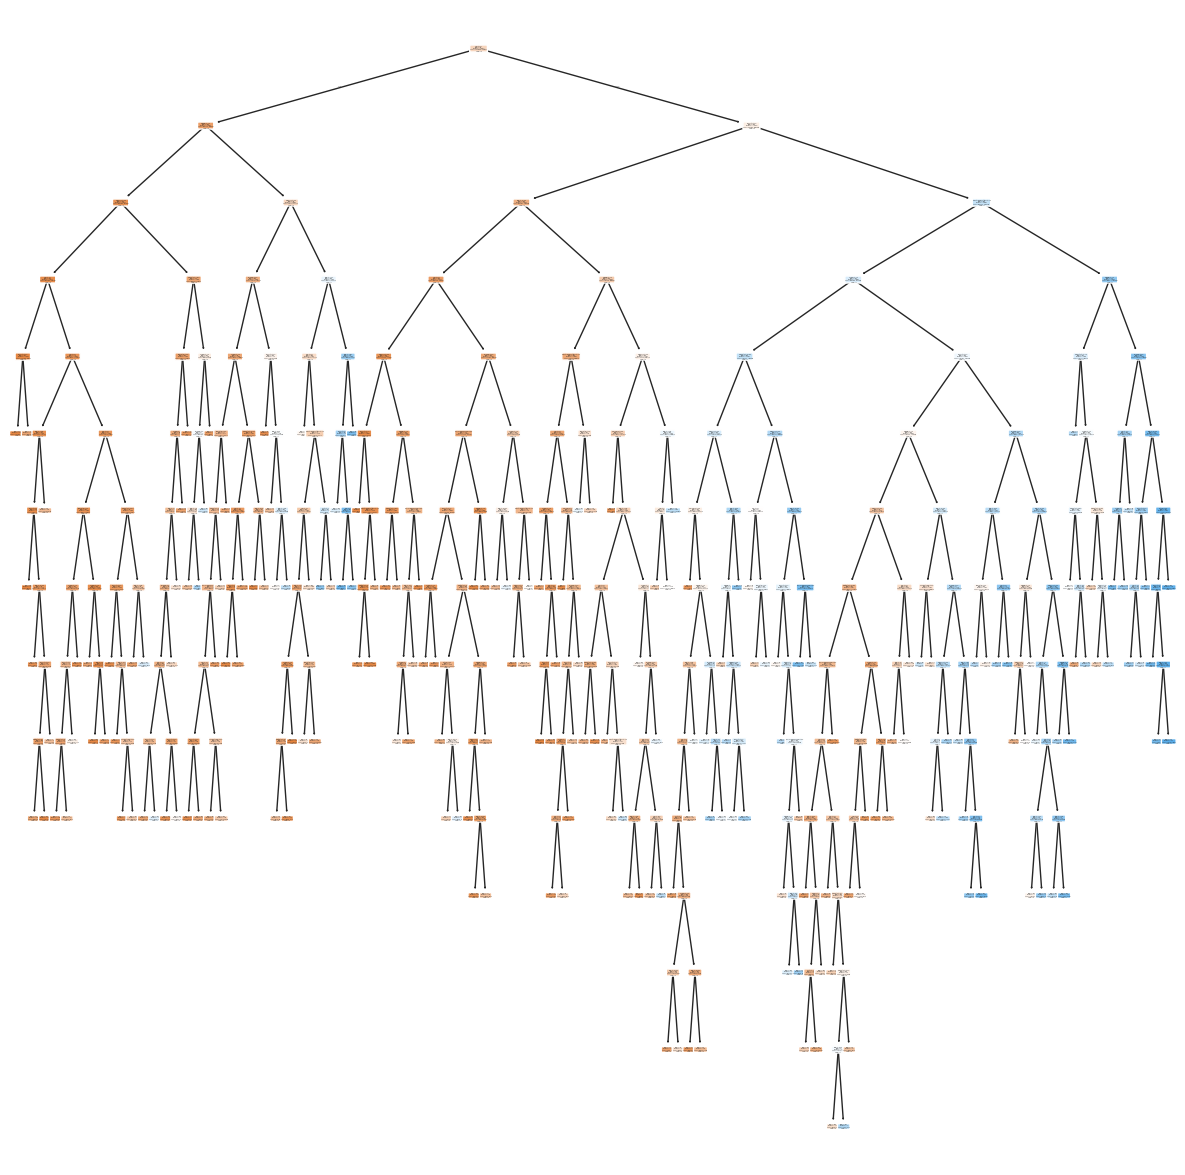

In [9]:
plt.figure(figsize = (15,15))

plot_tree(modell, feature_names=list(X_train.columns), class_names=modell.classes_.astype(str), filled=True, rounded=True)

plt.savefig("dt_tree.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )

plt.show()

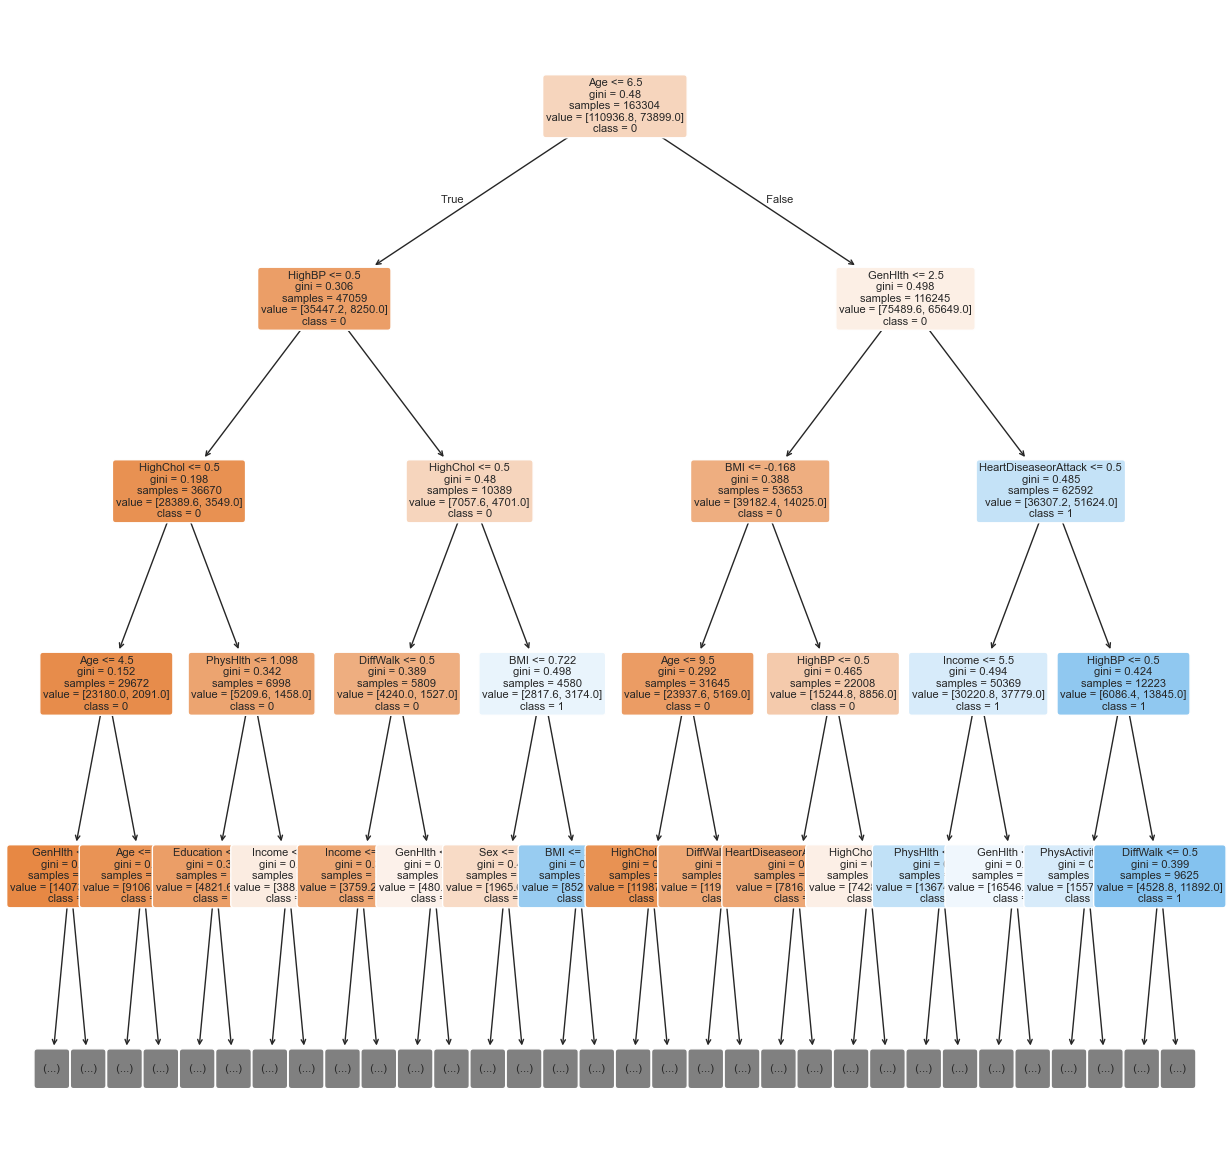

In [218]:
plt.figure(figsize = (15,15))

plot_tree(modell, feature_names=list(X_train.columns), class_names=modell.classes_.astype(str), filled=True, rounded=True, max_depth=4, fontsize=8)
plt.savefig("dt_tree_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

In [10]:
feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": modell.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feat_imp)

                 Feature  Importance
15               GenHlth    0.338384
18                   Age    0.248279
3                 HighBP    0.138387
0                    BMI    0.119040
4               HighChol    0.066283
8   HeartDiseaseorAttack    0.029772
20                Income    0.015820
16              DiffWalk    0.014050
2               PhysHlth    0.009807
17                   Sex    0.004305
5              CholCheck    0.003194
12     HvyAlcoholConsump    0.003054
19             Education    0.002856
1               MentHlth    0.002332
7                 Stroke    0.001398
10                Fruits    0.000821
6                 Smoker    0.000773
9           PhysActivity    0.000687
13         AnyHealthcare    0.000581
11               Veggies    0.000178
14           NoDocbcCost    0.000000


In [11]:
def explain_instance(tree: DecisionTreeClassifier, x_instance, feature_names):
    node = 0  # Start am Wurzelknoten
    tree_ = tree.tree_
    rules = []

    while tree_.feature[node] != _tree.TREE_UNDEFINED:
        feat = feature_names[tree_.feature[node]]
        thresh = tree_.threshold[node]
        value = x_instance[feat]

        # Entscheidung und Node-Info hinzufügen
        if value <= thresh:
            direction = "linker Kind"
            next_node = tree_.children_left[node]
            rules.append(
                f"Node {node}: {feat} = {value:.2f} <= {thresh:.2f} → gehe zu Node {next_node} (linker Kind)"
            )
        else:
            direction = "rechtes Kind"
            next_node = tree_.children_right[node]
            rules.append(
                f"Node {node}: {feat} = {value:.2f} >  {thresh:.2f} → gehe zu Node {next_node} (rechtes Kind)"
            )

        node = next_node

    # Blatt erreicht:
    values = tree_.value[node][0]
    pred_class = tree.classes_[values.argmax()]
    rules.append(f"Node {node} (Blatt): Vorhersage = {pred_class}, Verteilung = {values}")

    return "\n".join(rules)

# Beispielaufruf:
x0 = X_test.iloc[1]
print(explain_instance(modell, x0, list(X_train.columns)))

Node 0: Age = 10.00 >  6.50 → gehe zu Node 2 (rechtes Kind)
Node 2: GenHlth = 3.00 >  2.50 → gehe zu Node 4 (rechtes Kind)
Node 4: HeartDiseaseorAttack = 0.00 <= 0.50 → gehe zu Node 11 (linker Kind)
Node 11: Income = 4.00 <= 5.50 → gehe zu Node 21 (linker Kind)
Node 21: PhysHlth = -0.51 <= -0.23 → gehe zu Node 47 (linker Kind)
Node 47: HighChol = 0.00 <= 0.50 → gehe zu Node 53 (linker Kind)
Node 53: CholCheck = 1.00 >  0.50 → gehe zu Node 66 (rechtes Kind)
Node 66: HighBP = 1.00 >  0.50 → gehe zu Node 68 (rechtes Kind)
Node 68: DiffWalk = 1.00 >  0.50 → gehe zu Node 194 (rechtes Kind)
Node 194: Age = 10.00 <= 11.50 → gehe zu Node 195 (linker Kind)
Node 195 (Blatt): Vorhersage = 1, Verteilung = [0.34161819 0.65838181]


In [12]:
print(explain_instance(modell, obs_2n, list(X_test.columns)))

Node 0: Age = 11.00 >  6.50 → gehe zu Node 2 (rechtes Kind)
Node 2: GenHlth = 4.00 >  2.50 → gehe zu Node 4 (rechtes Kind)
Node 4: HeartDiseaseorAttack = 0.00 <= 0.50 → gehe zu Node 11 (linker Kind)
Node 11: Income = 3.00 <= 5.50 → gehe zu Node 21 (linker Kind)
Node 21: PhysHlth = -0.54 <= -0.23 → gehe zu Node 47 (linker Kind)
Node 47: HighChol = 0.00 <= 0.50 → gehe zu Node 53 (linker Kind)
Node 53: CholCheck = 1.00 >  0.50 → gehe zu Node 66 (rechtes Kind)
Node 66: HighBP = 1.00 >  0.50 → gehe zu Node 68 (rechtes Kind)
Node 68: DiffWalk = 1.00 >  0.50 → gehe zu Node 194 (rechtes Kind)
Node 194: Age = 11.00 <= 11.50 → gehe zu Node 195 (linker Kind)
Node 195 (Blatt): Vorhersage = 1, Verteilung = [0.34161819 0.65838181]


In [13]:
print(explain_instance(modell, obs_2p, list(X_train.columns)))

Node 0: Age = 9.00 >  6.50 → gehe zu Node 2 (rechtes Kind)
Node 2: GenHlth = 2.00 <= 2.50 → gehe zu Node 3 (linker Kind)
Node 3: BMI = 1.04 >  -0.17 → gehe zu Node 8 (rechtes Kind)
Node 8: HighBP = 1.00 >  0.50 → gehe zu Node 10 (rechtes Kind)
Node 10: HighChol = 0.00 <= 0.50 → gehe zu Node 31 (linker Kind)
Node 31: CholCheck = 1.00 >  0.50 → gehe zu Node 136 (rechtes Kind)
Node 136: BMI = 1.04 >  0.43 → gehe zu Node 138 (rechtes Kind)
Node 138: Income = 5.00 <= 7.50 → gehe zu Node 141 (linker Kind)
Node 141 (Blatt): Vorhersage = 0, Verteilung = [0.52283056 0.47716944]


In [14]:
def explain_instance(tree: DecisionTreeClassifier, x_instance, feature_names):
    node = 0  # Start am Wurzelknoten
    tree_ = tree.tree_
    rules = []

    while tree_.feature[node] != _tree.TREE_UNDEFINED:
        feat = feature_names[tree_.feature[node]]
        thresh = tree_.threshold[node]
        value = x_instance[feat]

        # Entscheidung und Node-Info hinzufügen
        if value <= thresh:
            direction = "linker Kind"
            next_node = tree_.children_left[node]
            rules.append(
                f"Node {node}: {feat} = {value:.2f} <= {thresh:.2f} → gehe zu Node {next_node} (linker Kind)"
            )
        else:
            direction = "rechtes Kind"
            next_node = tree_.children_right[node]
            rules.append(
                f"Node {node}: {feat} = {value:.2f} >  {thresh:.2f} → gehe zu Node {next_node} (rechtes Kind)"
            )

        node = next_node

    # Blatt erreicht:
    values = tree_.value[node][0]
    pred_class = tree.classes_[values.argmax()]
    rules.append(f"Node {node} (Blatt): Vorhersage = {pred_class}, Verteilung = {values}")

    return "\n".join(rules)

# Beispielaufruf:
x1 = X_test.iloc[2]
print(explain_instance(modell, x1, list(X_train.columns)))

Node 0: Age = 5.00 <= 6.50 → gehe zu Node 1 (linker Kind)
Node 1: HighBP = 0.00 <= 0.50 → gehe zu Node 5 (linker Kind)
Node 5: HighChol = 0.00 <= 0.50 → gehe zu Node 17 (linker Kind)
Node 17: Age = 5.00 >  4.50 → gehe zu Node 62 (rechtes Kind)
Node 62: Age = 5.00 <= 5.50 → gehe zu Node 215 (linker Kind)
Node 215: BMI = -0.24 <= 1.02 → gehe zu Node 217 (linker Kind)
Node 217: GenHlth = 2.00 <= 2.50 → gehe zu Node 219 (linker Kind)
Node 219 (Blatt): Vorhersage = 0, Verteilung = [0.97103212 0.02896788]


In [15]:
print(explain_instance(modell, obs_1n, list(X_train.columns)))

Node 0: Age = 6.00 <= 6.50 → gehe zu Node 1 (linker Kind)
Node 1: HighBP = 0.00 <= 0.50 → gehe zu Node 5 (linker Kind)
Node 5: HighChol = 0.00 <= 0.50 → gehe zu Node 17 (linker Kind)
Node 17: Age = 6.00 >  4.50 → gehe zu Node 62 (rechtes Kind)
Node 62: Age = 6.00 >  5.50 → gehe zu Node 216 (rechtes Kind)
Node 216: Sex = 0.00 <= 0.50 → gehe zu Node 221 (linker Kind)
Node 221: Education = 4.00 <= 4.50 → gehe zu Node 231 (linker Kind)
Node 231: Income = 7.00 >  5.50 → gehe zu Node 234 (rechtes Kind)
Node 234 (Blatt): Vorhersage = 0, Verteilung = [0.90284006 0.09715994]


In [16]:
print(explain_instance(modell, obs_1p, list(X_train.columns)))

Node 0: Age = 4.00 <= 6.50 → gehe zu Node 1 (linker Kind)
Node 1: HighBP = 0.00 <= 0.50 → gehe zu Node 5 (linker Kind)
Node 5: HighChol = 0.00 <= 0.50 → gehe zu Node 17 (linker Kind)
Node 17: Age = 4.00 <= 4.50 → gehe zu Node 61 (linker Kind)
Node 61: GenHlth = 1.00 <= 3.50 → gehe zu Node 63 (linker Kind)
Node 63 (Blatt): Vorhersage = 0, Verteilung = [0.95972449 0.04027551]


## E_T_D_2: Analyse der Erklärbarkeit von Entscheidungsbaum durch SHAP

In [207]:
explainer = shap.TreeExplainer(modell, X_train)
shap_values = explainer.shap_values(X_test)
base_value = explainer.expected_value

 93%|=================== | 94562/101472 [00:12<00:00]       

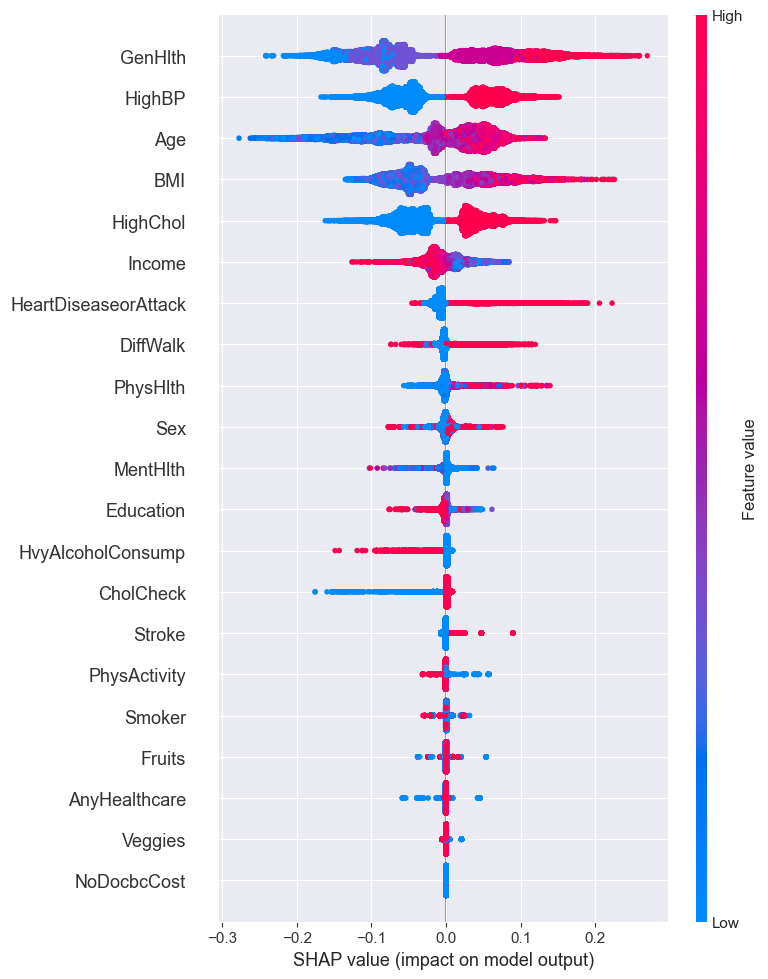

In [219]:
class_idx = 1
shap_class1 = shap_values[:, :, class_idx]

plt.figure(figsize = (15,7))
shap.summary_plot(
    shap_class1,
    X_test,
    feature_names=X_test.columns,
    max_display=21,
    show=False
)

plt.savefig("dt_shap_summaryplot.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )

plt.show()

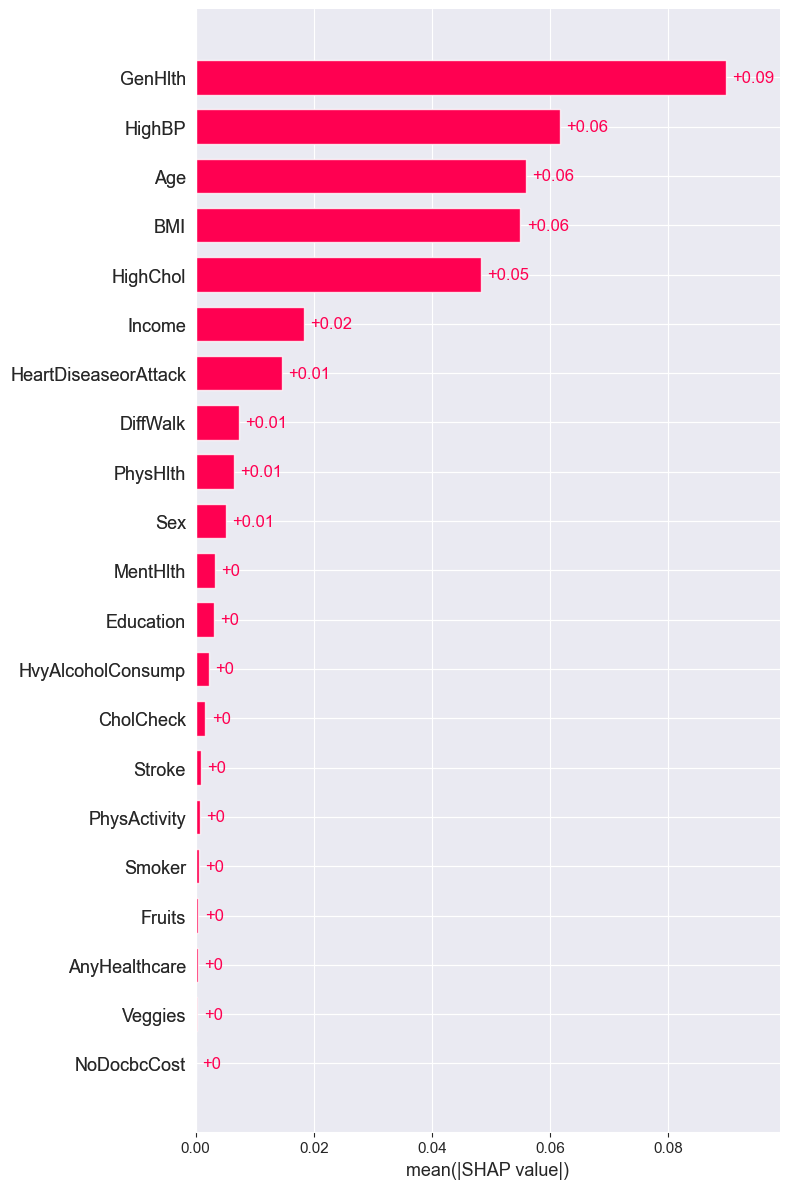

In [220]:
from shap import Explanation

sv_class1 = shap_values[:, :, 1]

base_val = explainer.expected_value[1]
base_vals = np.repeat(base_val, sv_class1.shape[0])

expl = Explanation(
    values        = sv_class1,
    base_values   = base_vals,
    data          = X_test.values,
    feature_names = list(X_test.columns)
)
plt.figure(figsize=(15, 7))
shap.plots.bar(
    expl,
    max_display=21,
    show=False
)
plt.tight_layout()
plt.savefig("dt_shap_barplot.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

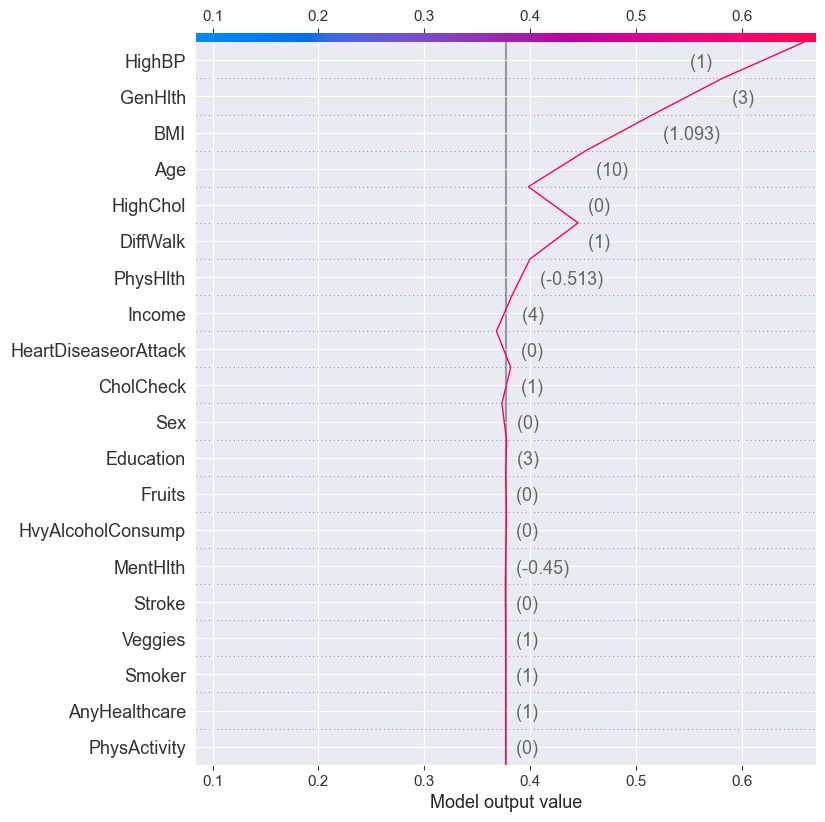

In [222]:
idx = 1
class_idx = 1

sv = shap_values[idx:idx+1, :, class_idx]
x = X_test.iloc[idx:idx+1]
feature_names = list(X_test.columns)
base_value = explainer.expected_value[class_idx]

plt.figure(figsize = (15,7))
shap.decision_plot(
    base_value,
    sv,
    x,
    feature_names=feature_names,
    show=False
)

plt.savefig("dt_shap_local_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )

plt.show()

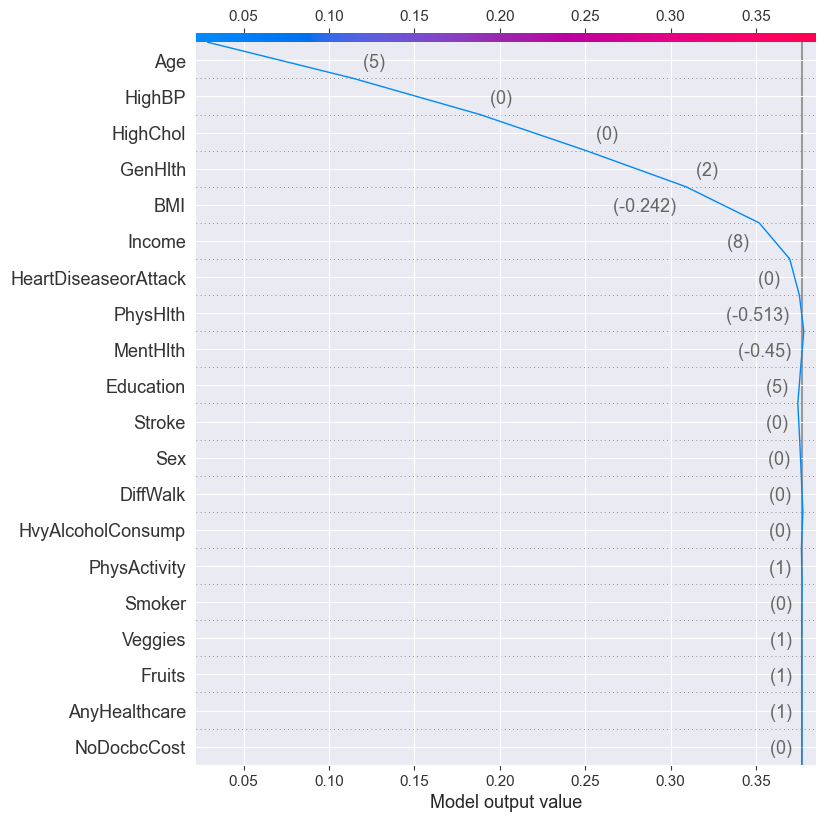

In [223]:
idx = 2
class_idx = 1

sv = shap_values[idx:idx+1, :, class_idx]
x = X_test.iloc[idx:idx+1]
feature_names = list(X_test.columns)
base_value = explainer.expected_value[class_idx]

plt.figure(figsize = (15,7))
shap.decision_plot(
    base_value,
    sv,
    x,
    feature_names=feature_names,
    show=False
)
plt.savefig("dt_shap_local_2.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 1500x700 with 0 Axes>

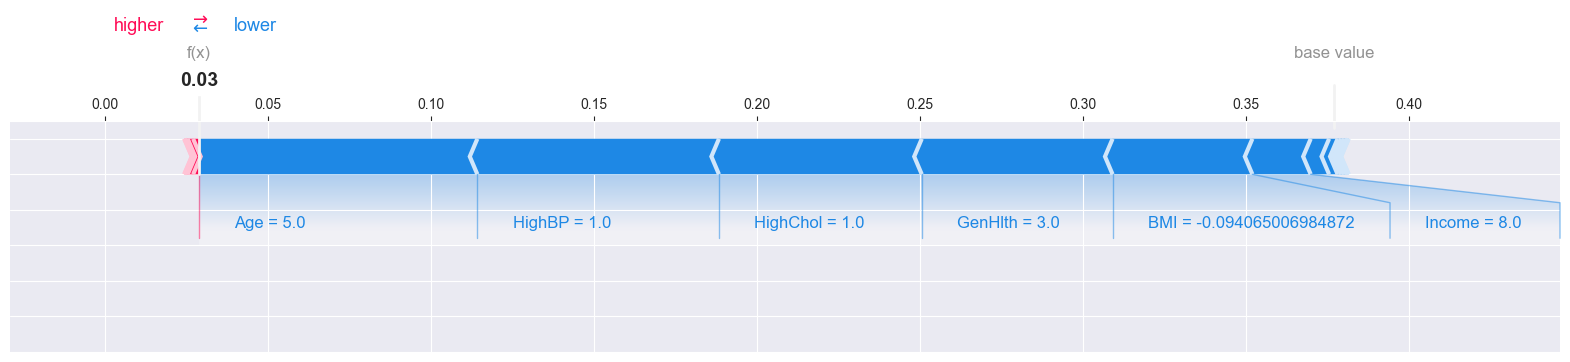

In [224]:
class_idx = 1
shap_class1 = shap_values[:, :, class_idx]
shap_inst1 = shap_class1[2]
features = X_test.columns

# Basis‑Wert des Modells (expected_value)
base_value = explainer.expected_value[1]  # für Klasse 1

# Force‑Plot für Instanz 0
plt.figure(figsize = (15,7))
shap.force_plot(
    base_value,
    shap_inst1,
    X_test.iloc[0],
    feature_names=features,
    matplotlib=True,
    show=False,
)
plt.savefig("dt_shap_local_force_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )

plt.show()

<Figure size 1500x700 with 0 Axes>

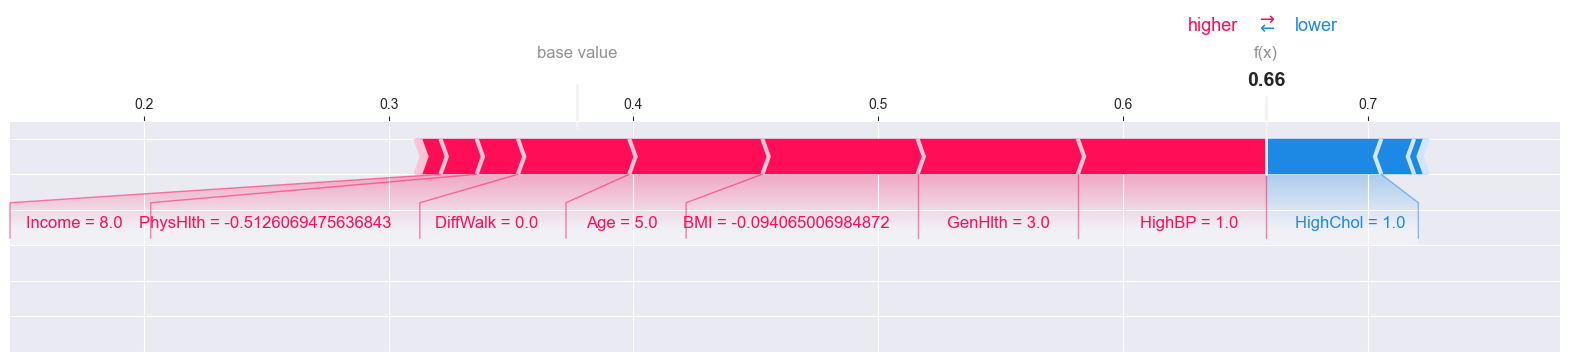

In [225]:
class_idx = 1
shap_class1 = shap_values[:, :, class_idx]
shap_inst1 = shap_class1[1]
features = X_test.columns

# Basis‑Wert des Modells (expected_value)
base_value = explainer.expected_value[1]  # für Klasse 1

# Force‑Plot für Instanz 0
plt.figure(figsize = (15,7))
shap.force_plot(
    base_value,
    shap_inst1,
    X_test.iloc[0],
    feature_names=features,
    matplotlib=True,
    show=False,
)
plt.savefig("dt_shap_local_force_2.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

## E_T_D_3: Analyse der Erklärbarkeit von Entscheidungsbaum durch LIME

In [214]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train.values,              # unbedingt Trainingsdaten
    feature_names = list(X_train.columns),
    class_names   = ['Keine Diabetes', 'Diabetes'],  # falls binär
    mode          = 'classification',            # oder 'regression'
    discretize_continuous = True
)

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


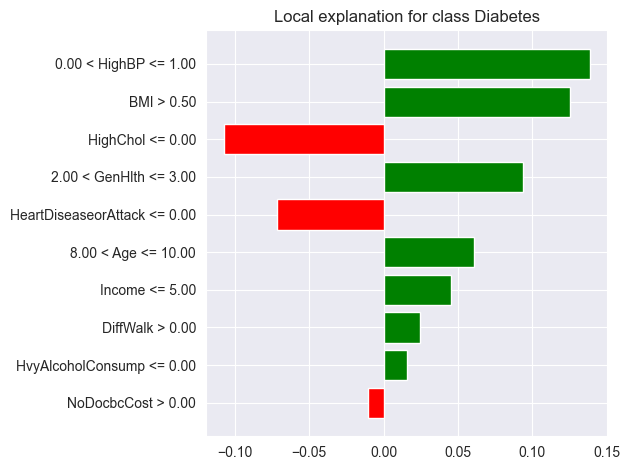

In [228]:
idx = 1
lime_exp = lime_explainer.explain_instance(
    data_row     = X_test.iloc[idx].values,
    predict_fn   = modell.predict_proba,
    num_features = 10
)
fig = lime_exp.as_pyplot_figure()
plt.tight_layout()
plt.savefig("dt_lime_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


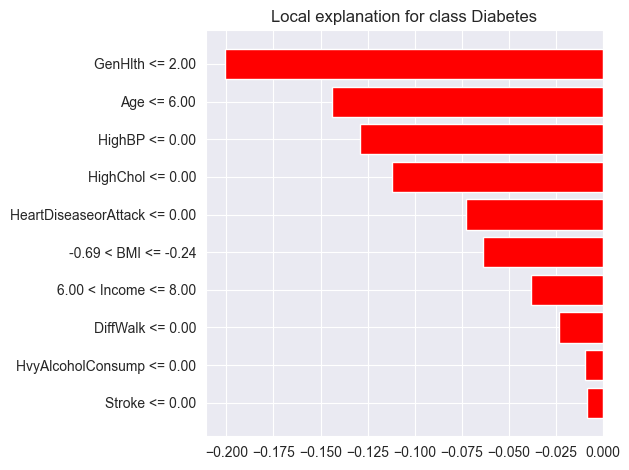

In [229]:
idx = 2
lime_exp = lime_explainer.explain_instance(
    data_row     = X_test.iloc[idx].values,
    predict_fn   = modell.predict_proba,
    num_features = 10
)
fig = lime_exp.as_pyplot_figure()
plt.tight_layout()
plt.savefig("dt_lime_2.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()